In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.rename(columns={'creatinine_phosphokinase' : 'cpk' ,'DEATH_EVENT':'death_event'}  , inplace=True)
df.head()

,age,anaemia,cpk,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
for i in df.columns:
  print(i,df[i].nunique())

age 47
anaemia 2
cpk 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
death_event 2


# EDA

# Bar Charts

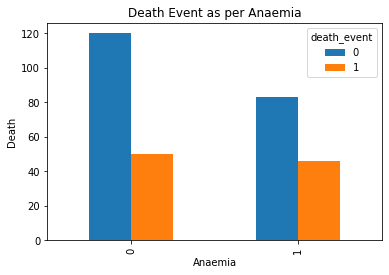

In [ ]:
pd.crosstab(df.anaemia  ,df.death_event).plot(kind='bar')
plt.title('Death Event as per Anaemia')
plt.xlabel('Anaemia')
plt.ylabel('Death')
plt.show()

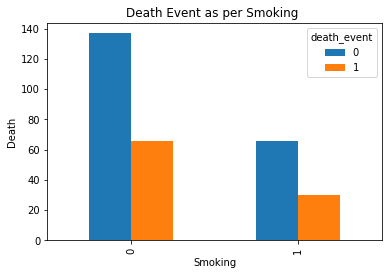

In [ ]:
pd.crosstab(df.smoking ,df.death_event).plot(kind='bar')
plt.title('Death Event as per Smoking ')
plt.xlabel('Smoking')
plt.ylabel('Death')
plt.show()

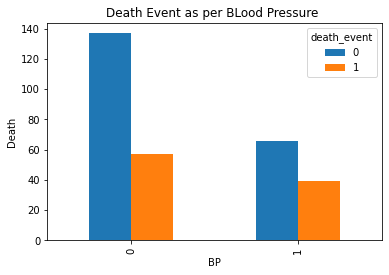

In [ ]:
pd.crosstab(df.high_blood_pressure  ,df.death_event).plot(kind='bar')
plt.title('Death Event as per BLood Pressure ')
plt.xlabel('BP')
plt.ylabel('Death')
plt.show()

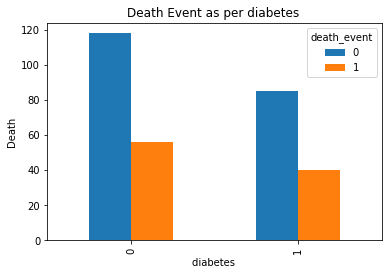

In [ ]:
pd.crosstab(df.diabetes ,df.death_event).plot(kind='bar')
plt.title('Death Event as per diabetes ')
plt.xlabel('diabetes ')
plt.ylabel('Death')
plt.show()

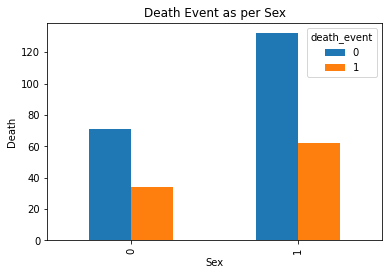

In [ ]:
pd.crosstab(df.sex ,df.death_event).plot(kind='bar')
plt.title('Death Event as per Sex')
plt.xlabel('Sex')
plt.ylabel('Death')
plt.show()

In [ ]:
g_30=list()
g_50=list()
g_70=list()
greater70 = list()
for i in df.age:
  if i<=30:
    g_30.append(1)
    g_50.append(0)
    g_70.append(0)
    greater70.append(0)

  elif i>30 and i<=50:
    g_30.append(0)
    g_50.append(1)
    g_70.append(0)
    greater70.append(0)
  
  elif i>50 and i<=70:
    g_30.append(0)
    g_50.append(0)
    g_70.append(1)
    greater70.append(0)
  
  elif i>70:
    g_30.append(0)
    g_50.append(0)
    g_70.append(0)
    greater70.append(1)

In [ ]:
df['age_till_30'] = g_30
df['age_bet_30_50'] = g_50
df['age_bet_50_70'] = g_70
df['age_gret_70'] = greater70


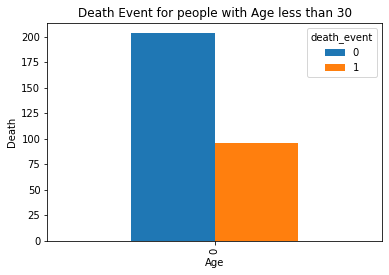

In [ ]:
pd.crosstab(df.age_till_30 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age less than 30')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

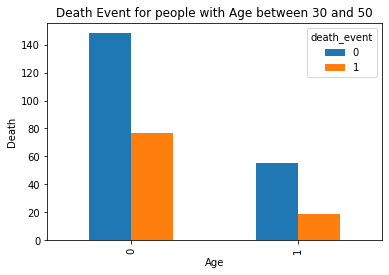

In [ ]:
pd.crosstab(df.age_bet_30_50 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age between 30 and 50')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

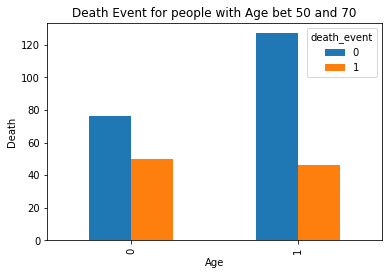

In [ ]:
pd.crosstab(df.age_bet_50_70 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age bet 50 and 70')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

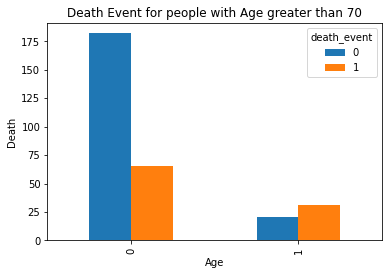

In [ ]:
pd.crosstab(df.age_gret_70 ,df.death_event).plot(kind='bar')
plt.title('Death Event for people with Age greater than 70')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

# Long Form Chart

In [ ]:
fig = px.bar(df, x="age", y="diabetes", color="death_event", title="Long-Form Input")
fig.show()

In [ ]:
fig = px.bar(df, x="age", y="sex", color="death_event", title="Long-Form Input")
fig.show()

# Box Plot

In [ ]:
import plotly.express as px
fig = px.violin(df, y="age", x="sex", color="death_event", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Sex on Death Event")
fig.show()

In [ ]:
import plotly.express as px
fig = px.violin(df, y="age", x="smoking", color="death_event", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Death Event")
fig.show()

# Training

In [ ]:
X = df.drop(columns=('death_event'),axis=1)
y = df.death_event

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,age,anaemia,cpk,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25, random_state=1 )

In [ ]:
X_train2 = X_train.drop(columns=['cpk'],axis=1)
X_test2 = X_test.drop(columns=['cpk'],axis=1)

In [ ]:
# class_weight = {0:1 , 1:2}
model = CatBoostClassifier(n_estimators=100  ,  depth = 8 )
model.fit(X_train , y_train)

print(model.score(X_test , y_test))
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, model.predict(X_train))))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))


Learning rate set to 0.044925
0:	learn: 0.6838502	total: 2.99ms	remaining: 296ms
1:	learn: 0.6731998	total: 5.4ms	remaining: 265ms
2:	learn: 0.6645094	total: 7.63ms	remaining: 247ms
3:	learn: 0.6570196	total: 9.96ms	remaining: 239ms
4:	learn: 0.6501170	total: 12.2ms	remaining: 231ms
5:	learn: 0.6357037	total: 13.1ms	remaining: 205ms
6:	learn: 0.6206202	total: 13.5ms	remaining: 179ms
7:	learn: 0.6087934	total: 15.8ms	remaining: 181ms
8:	learn: 0.5998387	total: 18.1ms	remaining: 183ms
9:	learn: 0.5917190	total: 20.4ms	remaining: 184ms
10:	learn: 0.5857363	total: 22.8ms	remaining: 184ms
11:	learn: 0.5780319	total: 25.1ms	remaining: 184ms
12:	learn: 0.5683703	total: 27.4ms	remaining: 183ms
13:	learn: 0.5621838	total: 29.6ms	remaining: 182ms
14:	learn: 0.5543553	total: 31.9ms	remaining: 181ms
15:	learn: 0.5478754	total: 34.2ms	remaining: 180ms
16:	learn: 0.5405897	total: 36.5ms	remaining: 178ms
17:	learn: 0.5355939	total: 38.9ms	remaining: 177ms
18:	learn: 0.5298443	total: 41.2ms	remaining:

In [ ]:
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.92      0.60      0.73        20

    accuracy                           0.88        75
   macro avg       0.90      0.79      0.83        75
weighted avg       0.88      0.88      0.87        75



In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)
print('True Positive' , cm[0,0])
print('False Positive' , cm[0,1])
print('True Negative' , cm[1,1])
print('False Negative' , cm[1,0])

[[54  1]
 [ 8 12]]
True Positive 54
False Positive 1
True Negative 12
False Negative 8


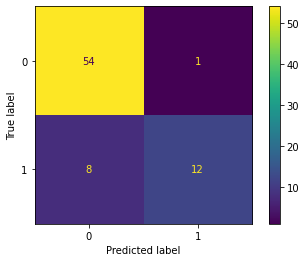

In [ ]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()